# matplotlib tutorial (7) nitta@tsuda.ac.jp

# Chapter 7: Saving / loading / Displaying of Images

"Save to image file".

For the sake of simplicity, this tutorial will use the image data from the database of <code>tensorflow.keras</code>.

Google Colab can use tensorflow by default, but if tensorflow is not installed in your jupyter notebook environment, install it whth the <code>pip</code> command.


In [ ]:
## If you use jupyter notebook on your PC, please install 'tensorflow' package.
# ! pip install tensorflow

<h3><font color="red"><b>Rule [7-1]:</b>  When displaying image data of Numpy array format, convert grayscale images to <code>uint8</code> type arrays of [0, 255] and color images to <code>float32</code> type arrays of [0, 1], and then apply <code>Axes.imshow()</code>.</font></h3>

<ul>
<li><font color="blue">Axes.imshow(X, cmap=None, vmin=None, vmax=None ...)</font></li>
<pre>
    Parameters:
        X: Numpy Array or PIL image
        Shapes of the supported Numpy array type:
        (M, N) ... a gray scale image. call it with <code>cmap='gray', vmin=0, vmax=255</code>
        (M, N, 3 or 4) ... a color image. Numpy array with 'float32' type elements of range[0.0, 1.0], or with uint8' type elements of range [0, 255].
</pre>
</ul>

For a gray scale image (number of channel = 1), convert it to a Numpy array with 'unit8' type elements of range [0, 255].
And for a color image (number of channels = 3 or 4),  convert it to a Numpy array with 'float32' type element of range [0.0, 1.0].

Then apply the 'Axes.imshow()' function to the image.


## 7-1: Display a grayscale image, using  <code>Axes.imshow()</code>

The image displayed must be a 2-dimensional array.
If the elements of the array are integers, the brightness (0: black, 255: white) is expressed in range [0, 255].
When the element of the array are 'float', the brightness (0.0: black, 1.0: white) is expressed in the range [0.0, 1.0].


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
# Prepare the image data of MNIST (handwritten characters)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# Examine the types of elements of the Numpy array of a gray scale image.
type(x_train[0][0][0])

numpy.uint8

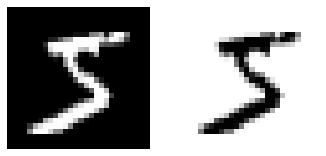

In [ ]:
# sample code 7-1
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fig, ax = plt.subplots(1, 2, figsize=(2.8 * 2, 2.8))

img1 = x_train[0]
img2 = 255 - img1   # invert image

ax[0].imshow(img1, cmap='gray')
ax[0].axis('off')

ax[1].imshow(img2, cmap='gray')
ax[1].axis('off')

plt.show()

## 7-2: Display color images, using <code>Axes.imshow()</code>

Color image data is a tensor in (Rows, Cols, Channels) or (Channels, Rows, Cols) format.
The number of channels element is 3 which represents the brightness of RGB.

In CIFAR10 using now, the image format is (Rows, Cols, Channels).

When each element of RGB is an integer, it represents brightness (0: dark, 255: bright) in the range [0, 255].
When each element of RGB is a floating fraction, the brightness (0.0: dark, 1.0: bright) is expressed in the range [0.0, 1.0].


In [ ]:
# Prepare image data of cifar10
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Examine the types of elements of the Numpy array of a RGB image.
type(x_train[0][0][0][0])

numpy.uint8

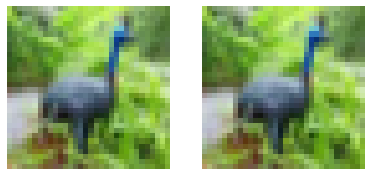

In [ ]:
# sample code 7-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fig, ax = plt.subplots(1, 2, figsize=(3.2 * 2, 3.2))

img1 = x_train[6]  # [0, 255]
img2 = img1.astype('float32') / 255. # [0.0, 1.0]

ax[0].imshow(img1)
ax[0].axis('off')

ax[1].imshow(img2)
ax[1].axis('off')

plt.show()

In [ ]:
# The types of elements of the Numpy array of a RGB image.
# When using images in Deep Learning, it is easier to use 'float32' type in the range of [0.0, 1.0] or [-1.0, 1.0].
type(img2[0,0,0])

numpy.float32

## Preparation for 7-3: Download and extract image files from the network

In preparation for 7-3, download (a part of) the face image file of VidTIMIT dataset from the network and extract it.

Official WWW of VidTIMIT dataset: <br />
<a href="http://conradsanderson.id.au/vidtimit/"> 
http://conradsanderson.id.au/vidtimit/
</a> <br />

zip files of 2 persons of VidTIMIT dataset: <br />
<a href="https://zenodo.org/record/158963/files/fadg0.zip">
https://zenodo.org/record/158963/files/fadg0.zip
</a><br />
<a href="https://zenodo.org/record/158963/files/faks0.zip">
https://zenodo.org/record/158963/files/faks0.zip
</a> <br />

In [ ]:
# Download data from the specified URL to the specified path.
import os
import urllib.request

url = 'https://zenodo.org/record/158963/files/fadg0.zip'
filepath = 'data/fadg0.zip'

dpath, fname = os.path.split(filepath)
os.makedirs(dpath, exist_ok=True)
urllib.request.urlretrieve(url, filepath)

('data/fadg0.zip', <http.client.HTTPMessage at 0x7f0a1626e250>)

In [ ]:
# Examine the downloaded file.
if os.name == 'nt':
    LS = 'dir'
    LS_R = 'dir /s'
else:
    LS = 'ls -l'
    LS_R = 'ls -lR'

!{LS} data

total 79684
-rw-r--r-- 1 root root 81593138 Mar 28 13:43 fadg0.zip


In [ ]:
# Extract the zip file to the specified folder.
import zipfile

with zipfile.ZipFile(filepath, 'r') as f:
    f.extractall(dpath)

In [ ]:
! {LS} data

total 79688
drwxr-xr-x 4 root root     4096 Mar 28 13:43 fadg0
-rw-r--r-- 1 root root 81593138 Mar 28 13:43 fadg0.zip


In [ ]:
! {LS} data/fadg0

total 8
drwxr-xr-x  2 root root 4096 Mar 28 13:43 audio
drwxr-xr-x 15 root root 4096 Mar 28 13:43 video


In [ ]:
! {LS} data/fadg0/video

total 84
drwxr-xr-x 2 root root 12288 Mar 28 13:43 head
drwxr-xr-x 2 root root 12288 Mar 28 13:43 head2
drwxr-xr-x 2 root root 20480 Mar 28 13:43 head3
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sa1
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sa2
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si1279
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si1909
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si649
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx109
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx19
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx199
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx289
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx379


##  7-3: Load images from files

It is asumed that the image file is in the following path.

./data/fadg0/video/head/[0-9]*

<h3><font color="red"><b>Rule [7-2]:</b>  Use the <code>load_img()</code> function of 'tensorflow.keras' to load image data from an image file.</font></h3>

load_img() / img_to_array() / array_to_img() / save_img() function is in either 
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
depending on the version of tensorflow.

<ul>
<li><font color="blue">load_img(path, grayscale=false, color_mode='rgb', target_size=None, interpolation='nearest')</font> ... Load an image file from the specified path and returns it as PIL format data.</li>
</ul>

Since the return value of the load_img() function is PIL format image data, it is easier to use later if it is converted to a Numpy array.

<pre>
    image_pil = load_img(path)
</pre>

<h3><font color="red"><b>Rule [7-3]:</b>  The image data returned from  <code>load_img()</code> function might be immediately converted from PIL format to Numpy array. </font></h3>

load_img() / img_to_array() / array_to_img() / save_img() function is in either
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
depending on the version of tensorflow.

Since the return value of the <code>load_img()</code> function is PIL format image data, it is easier to use later if it is converted to a Numpy array.
You can use the <code>img_to_array()</code> function for this conversion, but the <code>numpy.array()</code> function seems to be more popular.

<ul>
<li><font color="blue">img_to_array(img, data_format=None, dtype=None)</font> ... Convert PIL format image data to Numpy array.</li>
<li><font color="blue">numpy.array(object, dtype=None, ...)</font></li>
</ul>

The <code>img_to_array()</code> function returns a Numpy array whose element is 'uint8' of range [0, 255].
Applying <code>np.array()</code> to PIL format data without specifying <code>dtype</code> parameter also returns a Numpy array whose element is 'uint8' of range [0, 255].


<pre>
    image_uint8 = np.array(imgage_pil)
</pre>


<h3><font color="red"><b>Rule [7-4]:</b>Convert image data to the Numpy array with 'float32' element type of the range [0.0, 1.0] or [-1.0, 1.0].</font></h3>

When passing image data through a neural network, convert it to the Numpy array with 'float32' element type of the range [0.0, 1.0] or [-1.0, 1.0].

Use the following code to convert from a Numpy array of 'uint8' element type of range [0, 255]. 

<pre>
  image = image_uint8.astype('float32') / 255.   # [0, 255] --> [0, 1]
or
  image = image_uint8.astype('float32') / 127.5 - 127.5  # [0, 255] --> [-1, 1]
</pre>

The code of the reverse conversion is as follows.

<pre>
    image_uint8 = (image * 255).astype('uint8')   # [0, 1] ---> [0, 255]
or
    image_uint8 = ((image + 1) * 127.5).astype('uint8') # [-1, 1] --> [0, 255]
</pre>

In [ ]:
# Get the file paths at once
import os
import glob

DATA_DIR = './data/fadg0/video/head'

In [ ]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text)]

In [ ]:
# Use glob.glob to load the files in name order. The key argument was specified to support numbers in filenames.
DATA_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, '*')), key=natural_keys)

print(len(DATA_PATHS))
print(DATA_PATHS[0])

346
./data/fadg0/video/head/001


In [ ]:
# sample code 7-3
# Loading image files and converting them to Numpy arrays.

import numpy as np
import tensorflow as tf

image_uint8 = np.array(tf.keras.preprocessing.image.load_img(DATA_PATHS[0]))
image = image_uint8.astype('float32') / 255.0

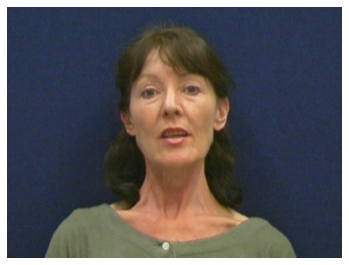

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(image)
ax.axis('off')

plt.show()

<h3><font color="red"><b>Rule [7-5]:</b>When displaying or saving a color image data, convert it to the Numpy array of 'float32' element with range[0.0, 1.0].</font></h3>

When displaying or saving a color image data, convert it to the Numpy array of 'float32' element with range[0.0, 1.0].
Use the following code to convert a Numpy array of 'float32' element type of the range [-1.0, 1.0] to the range [0.0, 1.0].

To convert between a Numpy array with 'float32' element type of range [0.0, 1.0] and that of range [-1.0, 1.0].

<pre>
    image = image * 2 - 1      # [0, 1] ---> [-1, 1]
    image = (image + 1) / 2    # [-1, 1] --> [0, 1]
</pre>

Use the <code>numpy.clip()</code> function to guarantee the range of element values.

<ul>
<li><font color="blue">numpy.clip(a, a_min, a_max, ...)</font></li>
<pre>
    Parameters:
        a: array
        a_min: Change value less than a_min to a_min
        a_max: Change value greater than a_max to a_max
    Returns:
        clipped_array: array whose element value range is [a_min, a_max]
</pre>
</ul>

<pre>
    image = np.clip(image, 0, 1)    # clipping element values between 0 and 1.
</pre>

## 7-4: Conversion of the range of element values of image data



In [ ]:
# sample code 7-4
# [0, 1] --> [-1, 1]
imageMP = image * 2 - 1

# [-1, 1] --> [0, 1]
image2 = np.clip((imageMP + 1) * 0.5, 0.0, 1.0)

<h3><font color="red"><b>Rule [7-6]:</b>  Usae the <code>save_img()</code> function to save image data in Numpy array to a file.</font></h3>

The function of load_img() / img_to_array() / array_to_img() / save_img() is in either
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
depending the version of tensorflow.

<ul>
<li><font color="blue">save_img(path, x, ...)</font> ... Saves the Numpy array to the file of the specified path.</li>
</ul>

The format of the image file to be saved can be specified by the <code>file_format</code> parameter, but if omitted, it is determined from the extension of the file name.

<pre>
    image_pil = load_img(path)
</pre>

## 7-5 Save image

Image data might be treaded as a Numpy array of the element type 'float32' and value range [0.0, 1.0] or [-1.0, 1.0].
If the range of element is [-1.0, 1.0], it is necessary to be converted to the range of [0.0, 1.0] when displaying or saving it.

To save it, use the <code>save_img()</code> function of 'tensorflow.keras'.

<ul>
<li>save_img(path, image, data_format=None, file_format=None, scale=True) ... Save the Numpy array of <code>image</code> data to the file <code>path</code>.</li>
</ul>

In [ ]:
# sample code 7-5
import tensorflow as tf

save_path = 'data/new_image.jpg'
tf.keras.preprocessing.image.save_img(save_path, image)

! {LS} {save_path}


-rw-r--r-- 1 root root 14875 Mar 28 13:43 data/new_image.jpg
